In [159]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [160]:
#Using sklearn to import the dataset and storing it in boston variable
from sklearn.datasets import load_boston
boston = load_boston()

In [161]:
boston.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR'])

In [162]:
# Lets check out the description of all the features that the dataset contains.
print(boston.DESCR)

Boston House Prices dataset

Notes
------
Data Set Characteristics:  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive
    
    :Median Value (attribute 14) is usually the target

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pupil-teacher ratio by town
      

In [163]:
# Column titles (feature names) can be accessed from the dataset. It has a key of (feature_names)
boston["feature_names"]

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

In [164]:
# Let us make a dataframe from the data which can be used for the EDA using pandas
df = pd.DataFrame(data = boston["data"])
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [165]:
#Changing the column names to the feature names from boston datasets
df.columns = boston["feature_names"]

In [166]:
# we have all the columns except the price(target). Let us get it by using its key from boston variable and 
# add it to the dataframe.
df["target"] = boston["target"]

In [167]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [168]:
df.shape

(506, 14)

In [169]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
CRIM       506 non-null float64
ZN         506 non-null float64
INDUS      506 non-null float64
CHAS       506 non-null float64
NOX        506 non-null float64
RM         506 non-null float64
AGE        506 non-null float64
DIS        506 non-null float64
RAD        506 non-null float64
TAX        506 non-null float64
PTRATIO    506 non-null float64
B          506 non-null float64
LSTAT      506 non-null float64
target     506 non-null float64
dtypes: float64(14)
memory usage: 55.4 KB


### The info() shows there are no null values present in the data.

In [170]:

df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.593761,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.596783,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.647423,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


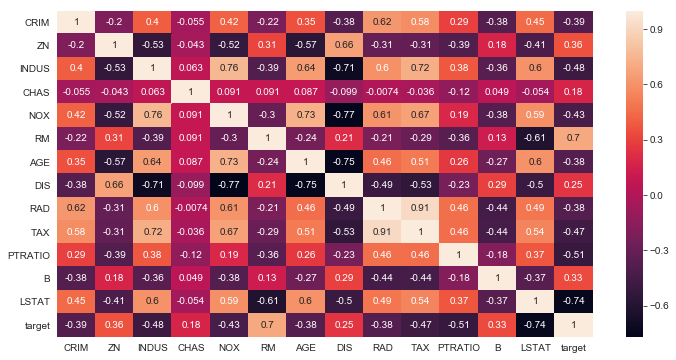

In [171]:
# Making a heatmap of the correlation coefficient of various features and our target
plt.figure(figsize = (12,6))
sns.heatmap(df.corr(), annot=True)

### The heatmap shows that there might be a linear relation of RM and price.
* Also lets have a look at target vs LSTAT 
* Target vs DIS
* Target vs NOX


## Lets have a look at the distribution of prices in the dataset

In [172]:
sns.set_style(style = 'whitegrid')

C:\Users\Pralav\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


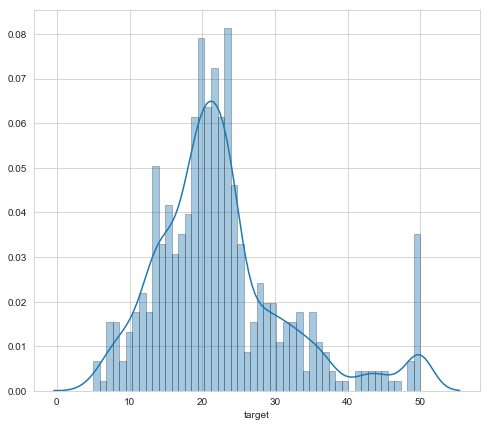

In [173]:
plt.figure(figsize=(8,7))
sns.distplot(df["target"], bins = 50, hist_kws=dict(edgecolor="k", linewidth=0.6))

### The histogram shows that the average price of the house is centered around 21-22 k. 
### Looks like the right hand side is a bit skewed

#### lets see some scatterplot for the features which may have a linear relationship with our target

C:\Users\Pralav\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(0,1,'Number of rooms vs target(price)')

<Figure size 576x648 with 0 Axes>

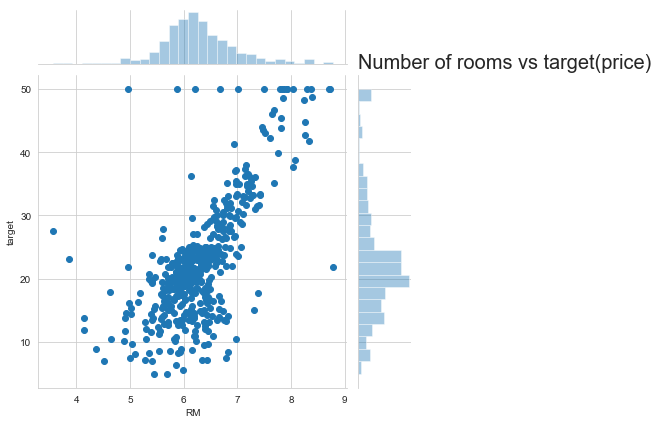

In [174]:
# target vs RM
plt.figure(figsize=(8,9))
sns.jointplot(x = "RM", y = "target", data = df)
plt.title("Number of rooms vs target(price)", loc = "left", fontsize=20)

### looks like a linear relationship exists between Number of room and price(target) as expected 

C:\Users\Pralav\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


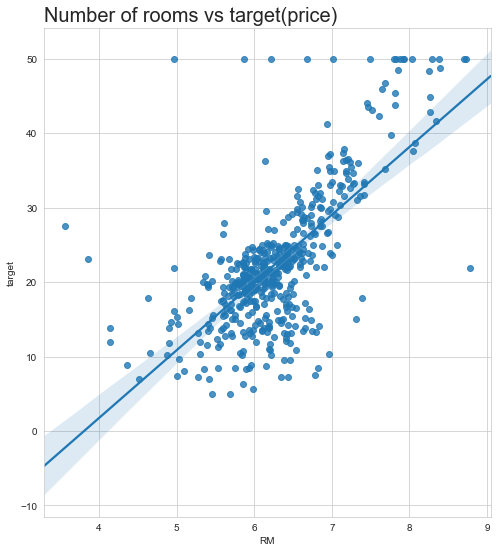

In [175]:
plt.figure(figsize=(8,9))
sns.regplot(x = "RM", y = "target", data = df)
plt.title("Number of rooms vs target(price)", loc = "left", fontsize=20)
plt.show()

In [176]:
#Caculating the correlation coefficent and p-value for the plot
from scipy import stats
pearson_coeff, p_value = stats.pearsonr(df["RM"], df["target"])
print("The Pearson Correlation Coefficient is ",  pearson_coeff, "and the p-value is ", p_value  )

The Pearson Correlation Coefficient is  0.6953599470715393 and the p-value is  2.487228871008295e-74


### The coeff indicates a good linear relation and the p_value also indicates a statiscal significance

### LSTAT vs Target

C:\Users\Pralav\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(0,1,'Lower Status Population vs target(price)')

<Figure size 504x504 with 0 Axes>

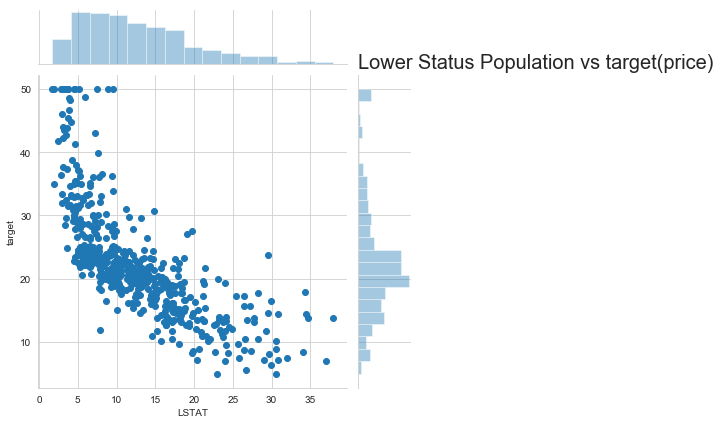

In [177]:
plt.figure(figsize=(7,7))
sns.jointplot(x = "LSTAT", y ="target", data = df, kind = "scatter")
plt.title("Lower Status Population vs target(price)", loc = "left", fontsize=20)

### We can see a negative relationship with the lower status population and target. The prices decreases as the LSTAT increases

In [178]:
pearson_coeff, p_value = stats.pearsonr(df["LSTAT"], df["target"])
print("The Pearson Correlation Coefficient is ",  pearson_coeff, "and the p-value is ", p_value  )

The Pearson Correlation Coefficient is  -0.7376627261740147 and the p-value is  5.081103394389002e-88


### The coeff indicates negative correlation as p_value is also small, it is significant(statistically)

### Pupil-teacher ratio by town vs Target

C:\Users\Pralav\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


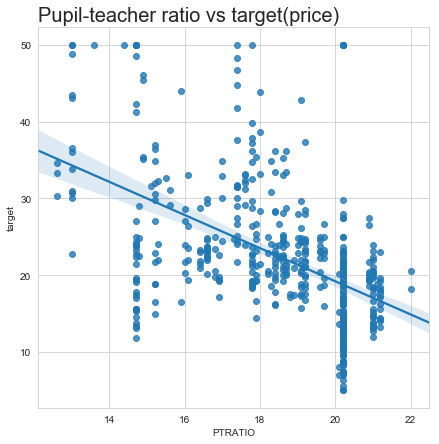

In [179]:
plt.figure(figsize=(7,7))
sns.regplot(x = "PTRATIO", y = "target", data = df)
plt.title("Pupil-teacher ratio vs target(price)", loc = "left", fontsize=20)
plt.show()

### It shows a negative relationship as number of pupils per teacher increases, the price decreases. The pupil number per class semms to effect the price. 

In [180]:
pearson_coeff, p_value = stats.pearsonr(df["PTRATIO"], df["target"])
print("The Pearson Correlation Coefficient of PTRATIO and target is ",  pearson_coeff, "and the p-value is ", p_value  )

The Pearson Correlation Coefficient of PTRATIO and target is  -0.5077866855375619 and the p-value is  1.6095094784731157e-34


### Per capita crime rate by town vs target

C:\Users\Pralav\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


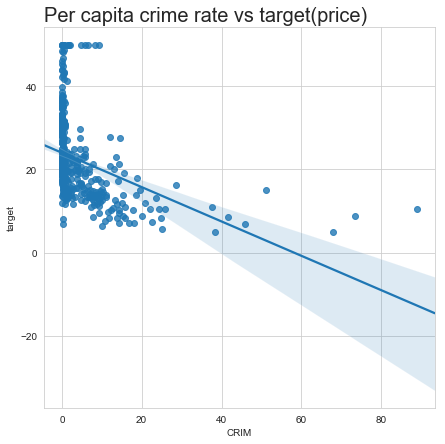

In [181]:
plt.figure(figsize=(7,7))
sns.regplot(x = "CRIM", y = "target", data = df)
plt.title("Per capita crime rate vs target(price)", loc = "left", fontsize=20)
plt.show()

### The graph shows that the price is influenced by the crime rate as expected

In [182]:
pearson_coeff, p_value = stats.pearsonr(df["CRIM"], df["target"])
print("The Pearson Correlation Coefficient of CRIM and target is ",  pearson_coeff, "and the p-value is ", p_value  )

The Pearson Correlation Coefficient of CRIM and target is  -0.3858316898839905 and the p-value is  2.0835501108141935e-19


## Nitric oxides concentration vs Target

C:\Users\Pralav\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


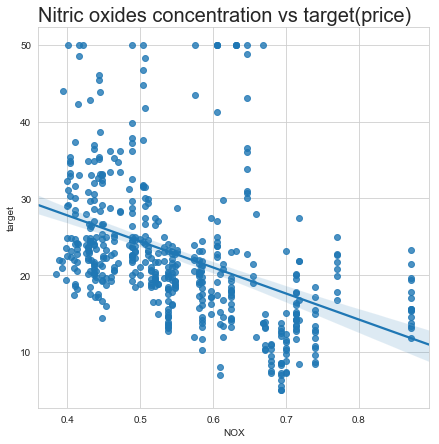

In [183]:
plt.figure(figsize=(7,7))
sns.regplot(x = "NOX", y = "target", data = df)
plt.title("Nitric oxides concentration vs target(price)", loc = "left", fontsize=20)
plt.show()

### Shows a strong negative correlation between nitrogen oxide concentration vs price. Price decreases as more nitrogen oxide is present in the air

In [184]:
pearson_coeff, p_value = stats.pearsonr(df["NOX"], df["target"])
print("The Pearson Correlation Coefficient of NOX and target is ",  pearson_coeff, "and the p-value is ", p_value  )

The Pearson Correlation Coefficient of NOX and target is  -0.4273207723732827 and the p-value is  7.065041586254333e-24


### Weighted distances to five Boston employment centres

C:\Users\Pralav\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


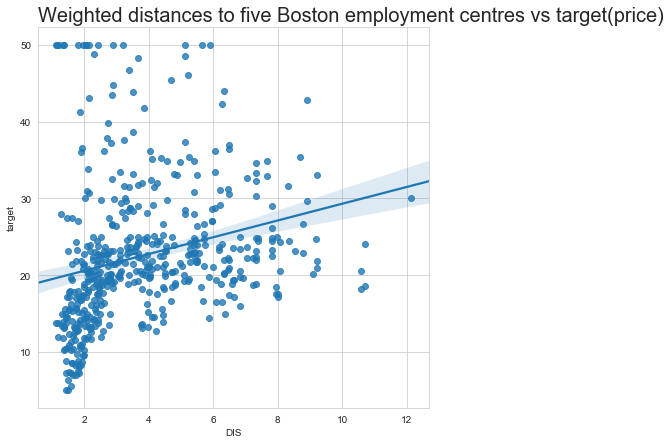

In [185]:
plt.figure(figsize=(7,7))
sns.regplot(x = "DIS", y = "target", data = df)
plt.title("Weighted distances to five Boston employment centres vs target(price)", loc = "left", fontsize=20)
plt.show()

In [186]:
pearson_coeff, p_value = stats.pearsonr(df["DIS"], df["target"])
print("The Pearson Correlation Coefficient of DIS and target is ",  pearson_coeff, "and the p-value is ", p_value  )

The Pearson Correlation Coefficient of DIS and target is  0.24992873408590394 and the p-value is  1.206611727337284e-08


### The coefficient indicates a positive linear relationship.

## Categorical data

Text(0.5,1,'Charles River bounds tract or not')

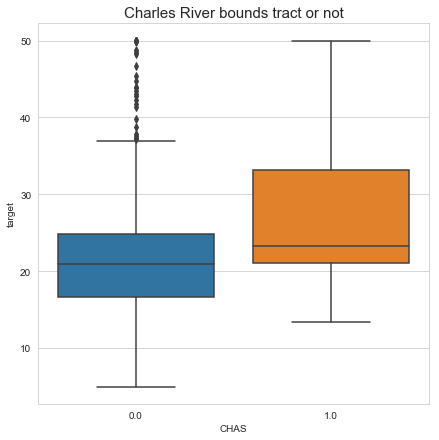

In [188]:
# Charles River (tract bounds river =1)
plt.figure(figsize=(7,7))
sns.boxplot(df["CHAS"], df["target"])
plt.title("Charles River bounds tract or not", fontsize = 15)

### The median price for the houses if the tract is bound near the houses has higher values. There is alot of outliers in the blue box

### Looking at the corr() heatmap. we can see RAD and TAX has a strong linear relationship of 0.91, which in itself can be produce colinearity. We should be very careful to pick that as an estimator

### I would think that 'NOX', 'RM', 'DIS', 'PTRATIO', 'LSTAT', 'CRIM' would be an good estimator to be used in the linear regression model